# Visualize ActivitySim Output

This notebook visualizes the results of the ActivitySim run, including memory usage, mode choice, and household income distribution.

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Memory Usage
Visualizing memory usage over the model run time.

In [1]:
def read_mem_log(mem_log_file_path, col_name):
    mem_df = pd.read_csv(mem_log_file_path)
    t = pd.to_datetime(mem_df.time, errors='coerce', format='%Y/%m/%d %H:%M:%S')
    seconds = (t - t.min()).dt.total_seconds()
    minutes = (seconds / 60)
    mem_df['minutes'] = minutes.round(2)
    mem_df['mem_gb'] = (mem_df[col_name].astype(np.int64) / 1_000_000_000)
    mem_df = mem_df.sort_values('minutes')
    mem_df = mem_df[['mem_gb', 'minutes']].set_index('minutes')
    return mem_df

def plot_mem_usage(mem_log_file_path, col_name, title):
    try:
        mem_df = read_mem_log(mem_log_file_path, col_name)
        with plt.style.context('ggplot'):
            ax = mem_df['mem_gb'].plot()
            ax.set_ylabel(f"{col_name} (GB)")
            ax.set_xlabel(f"runtime (minutes)")
            plt.title(title)
            plt.show()
    except FileNotFoundError:
        print(f"File not found: {mem_log_file_path}")
        print("Please check the path to omnibus_mem.csv")

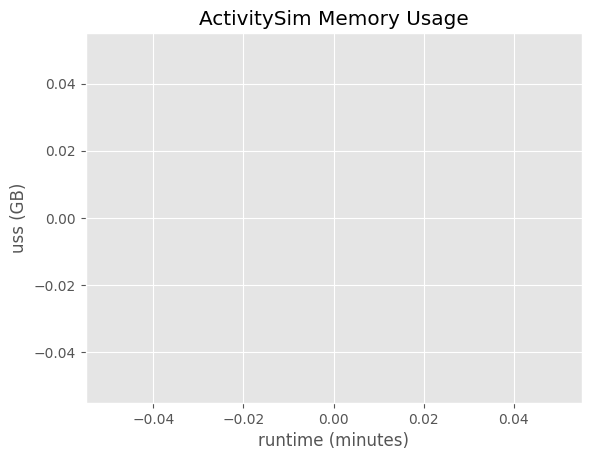

In [4]:
# Plot memory usage
# Using ../output/ assuming notebook is in tutorial/ and output/ is in parent dir
plot_mem_usage("../output/omnibus_mem.csv", 'uss', 'ActivitySim Memory Usage')

## 2. Trip Mode Split
Visualizing the share of each trip mode.

/var/folders/kn/3x821vdj65g70x4_c14d1rbc0000gn/T/ipykernel_28759/112779460.py:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv(trips_file)


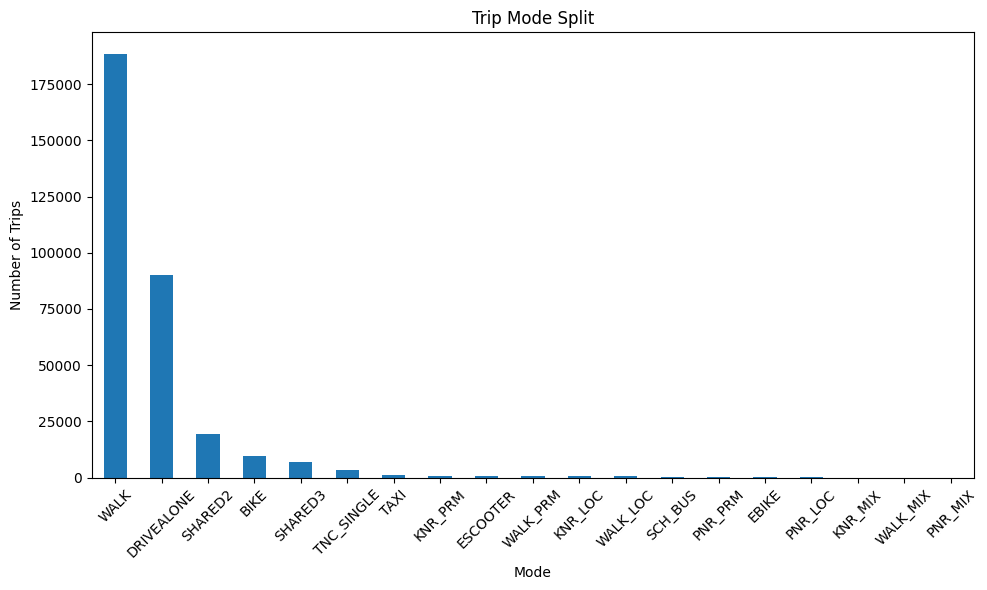

In [5]:
trips_file = "../output/final_trips.csv"
if os.path.exists(trips_file):
    trips = pd.read_csv(trips_file)
    mode_counts = trips['trip_mode'].value_counts()
    
    plt.figure(figsize=(10, 6))
    mode_counts.plot(kind='bar')
    plt.title('Trip Mode Split')
    plt.xlabel('Mode')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"File not found: {trips_file}")

## 3. Household Income Distribution
Visualizing the distribution of household income.

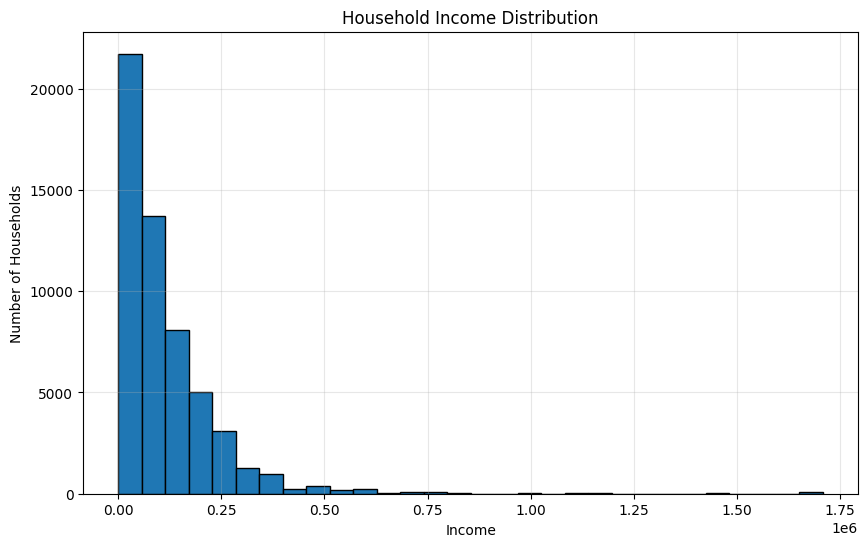

In [6]:
households_file = "../output/final_households.csv"
if os.path.exists(households_file):
    households = pd.read_csv(households_file)
    
    plt.figure(figsize=(10, 6))
    plt.hist(households['income'], bins=30, edgecolor='black')
    plt.title('Household Income Distribution')
    plt.xlabel('Income')
    plt.ylabel('Number of Households')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print(f"File not found: {households_file}")